In [1]:
##TASK 1: IMPORT PACKAGES & LOAD DATA

import pandas as pd
import os
import matplotlib.pyplot as plt
filename= input ('Please key in the file name: ')
df=pd.read_csv(filename)
df

In [3]:
path="F:\Document\DS &  ML\Python\Project/"
dataframe= pd.read_csv(path+"sales2019_1.csv")
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [5]:
##TASK 2: CLEAN & PREPROCESS DATA
###Task 2.1: Merge 12-month date


In [4]:
frames=[]
all_length=[]
for file in os.listdir(path): #lấy tên file trong thư mục
    if file.endswith('.csv'):
       filepaths = path + file
       df1=pd.read_csv(filepaths)
       frames.append(df1) 
       result=pd.concat(frames)  #gộp file các tháng
       length_1month=len(df1.index)
       all_length.append(length_1month)

df= result
df.to_csv('annualSales2019.csv',index=False)
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [7]:
print(sum(all_length)) #check độ dài file data gộp


934250


In [8]:
##Task 2.2: Add "Month" Column

df['Month']= df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
#df['Order Date'].str.slice(start=0,stop=2,step=1) #tách tháng từ cột Order Date: Cách 1: df['Order Date'].str.slice(0,2,1) 
#Cách 2: df['Order Date'].str[0:2]-->bỏ slice
#Cách 3: df['Order Date'].str.slice(0,2) --> bỏ luôn số 1

In [ ]:
#kiểm tra số tháng đã lấy
print(set(df['Month']))

{'11', '12', '07', '08', 'Or', '05', '06', nan, '02', '10', '04', '09', '03', '01'}


Task 2.3: Get rid of "NAN" & "OR"   

In [ ]:
df=df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
df=df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


TASK 3: REPORTING

In [ ]:
#kiểm tra kiểu dữ liệu 2 cột 'Quantity Ordered' & 'Price Each'
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


In [ ]:
#chuyển đổi kiểu dữ liệu 2 cột 'Quantity Ordered' & 'Price Each' từ object thành dạng số
df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'],downcast='integer')
df['Price Each']= pd.to_numeric(df['Price Each'],downcast='integer')

In [ ]:
##TASK 3.1: What was the best month for sales? How much was earned that month?

df['Sales']=df['Quantity Ordered'] * df['Price Each']
df.head()

# tuy nhiên cột 'Sales' đang nằm cuối--> khó nhìn

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99


In [ ]:
#Chuyển cột "Sales" về vị trí trước cột 'Order Date' để dễ nhìn 

moving_column= df.pop('Sales')
df.insert(4,'Sales',moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
# lấy tổng doanh thu hàng tháng --> groupby theo tháng

df.groupby('Month').sum()['Sales']


Month
01     7289026.92
02     8808089.68
03    11228401.52
04    13562680.96
05    12610427.00
06    10311209.04
07    10591103.04
08     8977871.52
09     8390240.52
10    14946907.52
11    12798412.80
12    18453773.36
Name: Sales, dtype: float64

In [ ]:
# lấy ra doanh thu lớn nhất
sales_value= df.groupby('Month').sum()['Sales']
sales_value.max()

18453773.36

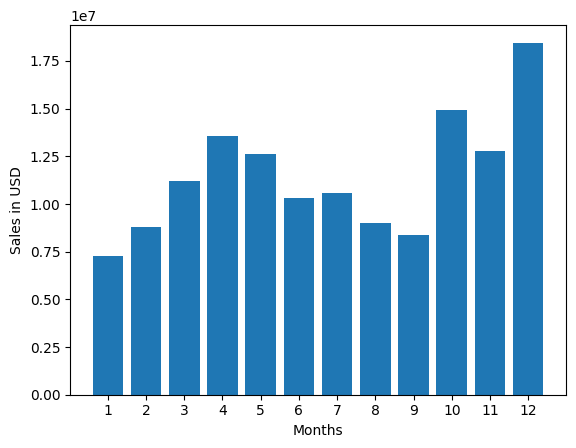

In [ ]:
#Vẽ bar chart doanh thu các tháng

months= range(1,13)
plt.bar(x=months,height=sales_value)
plt.xticks(months) # set label cho trục x
plt.xlabel('Months') # đặt tên cho trục x
plt.ylabel('Sales in USD') # đặt tên cho trục y
plt.show() # show chart


TASK 3.2: WHAT CITY HAS THE BEST SALES

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
# tách địa chỉ theo dấu phẩy
# sample_address='944 Walnut St, Boston, MA 02215'
# sample_address.split(',') --> Tách theo dấu ','
# sample_address.split(',')[1]  #--> lấy giá trị thứ 2

address_to_city= lambda address:address.split(',')[1]

df['City']=df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [ ]:
sales_value_city= df.groupby('City').sum()['Sales']
sales_value_city.max()

33048815.64

In [ ]:
cities= [city for city, sales in sales_value_city.items()]

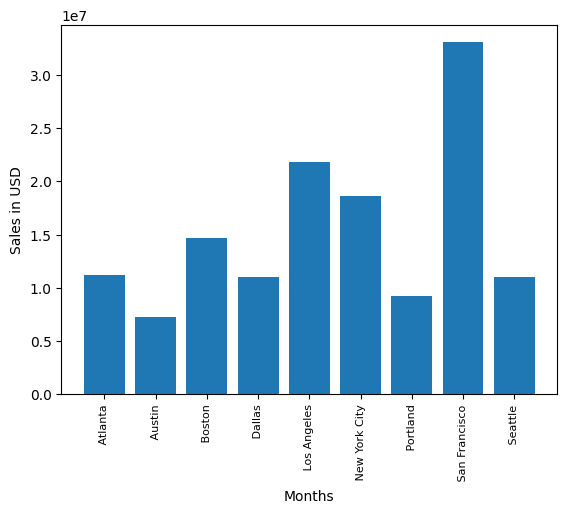

In [ ]:
plt.bar(x=cities,height=sales_value_city)
plt.xticks(cities, rotation=90, size=8) # set label cho trục x
plt.xlabel('Months') # đặt tên cho trục x
plt.ylabel('Sales in USD') # đặt tên cho trục y
plt.show() # show chart

TASK 3.3: WHAT TIME SHOULD WE DISPLAY ADS TO MAXIMUM THE LIKELIHOOD OF CUSTOMER'S BUYING PRODUCT?

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [ ]:
# print(df['Order Date'].dtypes) --> kiem tra kieu du lieu cot "Order Date"

df['Order Date']= pd.to_datetime(df['Order Date'])

In [ ]:
print(df['Order Date'].dtypes)

datetime64[ns]


In [ ]:
df['Hours']=df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


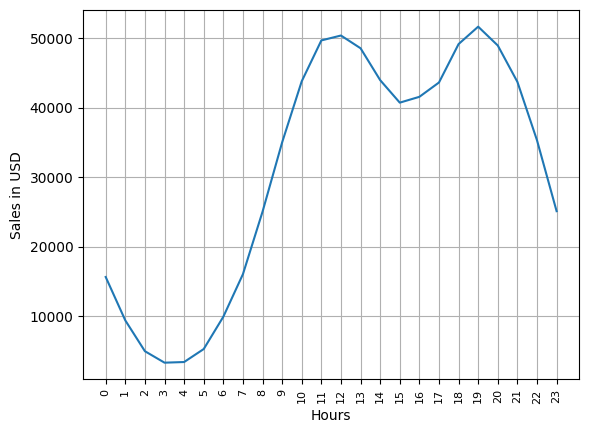

In [ ]:
sales_value_hours= df.groupby('Hours').count()['Sales']
hours= [hour for hour, sales in sales_value_hours.items()]

plt.plot(hours,sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8) # set label cho trục x
plt.xlabel('Hours') # đặt tên cho trục x
plt.ylabel('Sales in USD') # đặt tên cho trục y
plt.show() # show chart

TASK 3.4: WHAT PRODUCT ARE MOST OFTEN SOLD TOGETHER

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [ ]:
df_dup=df[df['Order Date'].duplicated(keep=False)]
df_dup.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [ ]:
groupProduct=lambda product:', '.join(product)

In [ ]:
df_dup['All product']=df_dup.groupby('Order Date')['Product'].transform(groupProduct)
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All product
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21,"iPhone, iPhone, iPhone, iPhone"
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14,"Lightning Charging Cable, Lightning Charging C..."
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13,"Wired Headphones, Apple Airpods Headphones, Wi..."
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20,"27in FHD Monitor, 34in Ultrawide Monitor, 27in..."
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11,"Wired Headphones, Wired Headphones, Wired Head..."


In [ ]:
df_dup=df_dup[['Order ID','Order Date','All product']].drop_duplicates()
df_dup.head()

,Order ID,Order Date,All product
0,141234,2019-01-22 21:25:00,"iPhone, iPhone, iPhone, iPhone"
1,141235,2019-01-28 14:15:00,"Lightning Charging Cable, Lightning Charging C..."
2,141236,2019-01-17 13:33:00,"Wired Headphones, Apple Airpods Headphones, Wi..."
3,141237,2019-01-05 20:33:00,"27in FHD Monitor, 34in Ultrawide Monitor, 27in..."
4,141238,2019-01-25 11:59:00,"Wired Headphones, Wired Headphones, Wired Head..."


In [ ]:
df_dup['All product'].value_counts().head(10)

All product
Lightning Charging Cable, Lightning Charging Cable, Lightning Charging Cable, Lightning Charging Cable            12584
USB-C Charging Cable, USB-C Charging Cable, USB-C Charging Cable, USB-C Charging Cable                            12478
AA Batteries (4-pack), AA Batteries (4-pack), AA Batteries (4-pack), AA Batteries (4-pack)                        12410
AAA Batteries (4-pack), AAA Batteries (4-pack), AAA Batteries (4-pack), AAA Batteries (4-pack)                    12375
Wired Headphones, Wired Headphones, Wired Headphones, Wired Headphones                                            10792
Apple Airpods Headphones, Apple Airpods Headphones, Apple Airpods Headphones, Apple Airpods Headphones             9175
Bose SoundSport Headphones, Bose SoundSport Headphones, Bose SoundSport Headphones, Bose SoundSport Headphones     7866
27in FHD Monitor, 27in FHD Monitor, 27in FHD Monitor, 27in FHD Monitor                                             4497
27in 4K Gaming Monitor, 27in

-->lấy ra các sản phẩm hay bán cùng nhau--> bán combo, khuyến mãi sản phẩn,....

TASK 3.5: WHAT PRODUCT SOLD THE MOST? WHY DO YOU THINK IT SOLD THE MOST?

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [10]:
print(df['Quantity Ordered'].dtypes)

object


In [5]:
all_products= df.groupby('Product').sum()['Quantity Ordered']
all_products

In [ ]:
all_products= df.groupby('Product').sum()['Quantity Ordered']
product_ls= [product for product, quant in all_products.items()]

plt.bar(product_ls,all_products)
plt.xticks(product_ls, rotation=90, size=8) 
plt.xlabel('Product') 
plt.ylabel('Quantity') 
plt.show()